# Dublin Bus Visualization

Public transport in Dublin has recently come under scrutiny due to dealys and massive congestion. The bus corridor along Trinity is so congested at peak times that it can take up to 20 minutes to travel the 500 metres from D'Olier Street to College Green. This is caused by two main issues: the routing of almost all radial buses services through this area and the extension of the Green Line Luas, which also runs through this lane.

Using the data from the Transport Omnibus 2014-2018, let's ask some interesting questions about bus transport and see if we can answer them.

How does weather affect the amount of people using public transport(rain and temperature)?

How has bus transport changed since the Luas was extended (e.g. punctuality % from report)?

How has no. of bus passengers changed as a percentage of the dublin population?

First, let's take a look at our data. Our files contain the number of bus passengers per month for 2011-2018, the percentage of total passengers per day and the percentage of total passengers per month. 

In [1]:
# preprocessing the passengers by month data, provided in two separate files
import pandas as pd; import matplotlib.pyplot as plt; import numpy as np

pbm14 = pd.read_excel("passengersbymonth14.xlsx")
pbm14.drop(2014, 1, inplace=True)
pbm18 = pd.read_excel("passengersbymonth18.xlsx")
pbm18.drop('Month', 1, inplace=True)
pbm = pd.concat([pbm14, pbm18], axis=1)
pbm.head()

,Month,2011,2012,2013,2014,2015,2016,2017,2018
0,January,9338408,8813606,9242355,8991175,9577528,9857291,10468427,11419534
1,February,9693248,9399904,9164152,9117393,9596458,10700553,10718425,11279304
2,March,10417913,10078356,9414331,10327497,10543380,10701987,12051139,11067489
3,April,9901813,9233672,9691480,9648830,10041339,11091977,10841832,12046319
4,May,9446686,9500542,9945249,9439479,9371545,10825747,11771832,12737152


In [2]:
# preprocessing the rain data, wd = number of wet days, rain = rainfall in mm
rain = pd.read_csv("raindata.csv")
rain = rain.loc[rain['year'].isin([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])]
rain = rain.astype({'wd':int})
rain.head()

,year,month,ind,rain,gdf,rd,wd
756,2011,1,0,25.5,10.9,10,5
757,2011,2,0,72.6,17.3,18,12
758,2011,3,0,14.6,6.8,10,4
759,2011,4,0,9.9,4.9,8,3
760,2011,5,0,29.3,5.0,22,11


In [3]:
# preprocessing the temperature data
temp = pd.read_csv("tempdata.csv", header=-1)
temp = temp.transpose()
temp.columns = ['date','temp']
temp['year'] = temp['date'].map(lambda x: int(x[:4]))
temp['month'] = temp['date'].map(lambda x: int(x[5:]))
temp = temp.astype({'temp':float})
temp = temp[['year','month','temp']]

## How does weather affect the amount of people using public transport (rain and temperature)?

To answer this, let's first get publicly available weather data from Met Eireann. Using the Merrion Square and Dublin Airport weather stations, and assuming the weather is reasonably homogeneous across Dublin, we can get data for the mean temperature and number of wet days for each month from 2011 to 2018. A wet day is defined as over 1.0mm of rainfall. 

Let's plot this for a single year first, for example 2018. 

<BarContainer object of 12 artists>

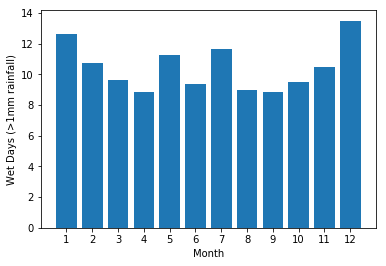

In [4]:
# average the number of rainy days per month over 2011-2018
wd = np.zeros(12)
for i in range(12):
    df = rain.loc[rain['month'] == i + 1]
    wd[i] = df['wd'].sum() / 8
plt.xticks(np.arange(1,13,1)); plt.ylabel('Wet Days (>1mm rainfall)'); plt.xlabel('Month')
plt.bar(np.arange(1,13,1), wd)


We what is generally expected, a rise during winter and a dip during summer. There is an interesting anomaly during May-July, as May and July experience a large amount of rain, but June does not. Perhaps this is caused by changing ocean currents. This anomaly is also seen in the number of bus passengers per month - May and July almost always see more bus passengers than June.

Now let's check out temperature.

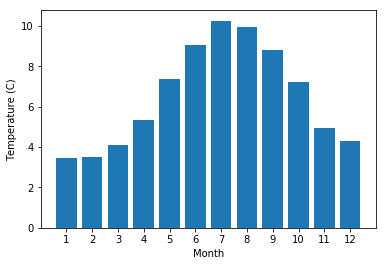

In [5]:
# average the temperature per month over 2011-2018
temp = temp.loc[temp['year'].isin([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])]
mtemp = np.zeros(12)
for i in range(12):
    df = temp.loc[temp['month'] == i + 1]
    mtemp[i] = df['temp'].sum() / 12
plt.xticks(np.arange(1,13,1)); plt.ylabel('Temperature (C)'); plt.xlabel('Month')
plt.bar(np.arange(1,13,1), mtemp)

As we would expect, temperature is very consistent.

Now let's average passengers by month over 2011-2018 and take a look. 

<BarContainer object of 12 artists>

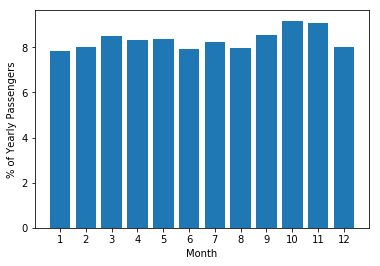

In [6]:
pbm['total'] = pbm.sum(axis=1)
pbm['total'] = pbm['total'] / pbm['total'].sum() * 100
plt.xticks(np.arange(1,13,1)); plt.ylabel('% of Yearly Passengers'); plt.xlabel('Month')
plt.bar(np.arange(1,13,1), pbm['total'])

At first, the results are surprising - there is very little variation at all. The colder months October and November see a small increase over the summer months, and drops again during December, when people are on holidays. However, this continues 
through to the coldest months January and February. A possible reason for this is people undertaking New Year's Resolutions, where they attempt to exercise more by walking or cycling (I'm sure a graph of gym memberships would spike right here).

However, the consistency of the graph is acceptable when the alternatives to bus transport are considered. Dublin's cycling infrastructure is generally poor, and commuting from the hilly outer suburban area can be difficult. Walking is too slow, and motorized vehicles such as scooters remain illegal. On top of this, the continual poor weather, even during the summer, makes commuting without shelter not worth the risk.

Finally, the lack of parking in the city centre, where the vast majority of offices are located, makes bus the preferred mode of transport for the majority of people.

Although we can already see that weather doesn't significantly impact bus use, let's plot it along with the average temperature and number of wet days.

<IPython.core.display.Javascript object>


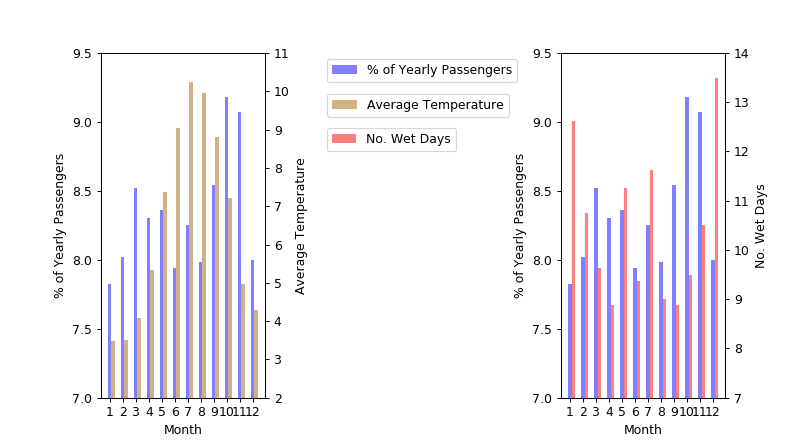

In [7]:
%matplotlib notebook # makes matplotlib figures bigger

# graph 1
barWidth = 0.25
r1 = np.arange(1, 13, 1)
r2 = [x + barWidth for x in r1]

fig, (ax1, ax3) = plt.subplots(1,2, figsize=(9,5))
fig.subplots_adjust(wspace = 1.8)
ax2 = ax1.twinx()
ax1.bar(r1, pbm['total'], width=barWidth, alpha=0.5, color='blue', label='% of Yearly Passengers')
ax2.bar(r2, mtemp, width=barWidth, alpha=0.5, color='#A5640F', label='Average Temperature')
ax1.set_ylim((7, 9.5))
ax2.set_ylim((2, 11))
ax1.set_ylabel('% of Yearly Passengers')
ax2.set_ylabel('Average Temperature')
ax1.set_xlabel('Month')
ax1.legend(bbox_to_anchor=(2.57, 1))
ax2.legend(bbox_to_anchor=(1.339, 0.9))
plt.xticks(r1)


# graph 2
ax4 = ax3.twinx()
ax3.bar(r1, pbm['total'], width=barWidth, alpha=0.5, color='blue', label='% of Yearly Passengers')
ax4.bar(r2, wd, width=barWidth, alpha=0.5, color='red', label='No. Wet Days')
ax3.set_ylim((7, 9.5))
ax4.set_ylim((7, 14))
ax3.set_ylabel('% of Yearly Passengers')
ax4.set_ylabel('No. Wet Days')
ax3.set_xlabel('Month')
ax4.legend(bbox_to_anchor=(-.6, 0.8))
plt.xticks(r1)
plt.show()



As expected, the percentage of yearly passengers is weakly related to the temperature, and more strongly related to number of wet days. However, the overall variation is very small due to the lack of alternatives to bus travel.

TODO:

How has bus transport changed since the Luas was extended (e.g. punctuality % from report)?

How has no. of bus passengers changed as a percentage of the dublin population?

Simulation of bus traffic overlayed on a map of population densities
